In [172]:
import json
import os
import random
from PIL import Image
from pycocotools import mask as mask_utils
import matplotlib.pyplot as plt
import numpy as np

split = "train"
img_dir = f"/data/coco/images/{split}2017/"
coco_ann_file = f'/data/coco/annotations/panoptic_detectron2_{split}2017.json'

with open(coco_ann_file) as f:
    coco_data = json.load(f)

coco_img_id_to_info = {}
for img_info in coco_data['images']:
    coco_img_id_to_info[img_info['id']] = img_info

coco_img_id_to_anns = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    if img_id not in coco_img_id_to_anns:
        coco_img_id_to_anns[img_id] = []
    coco_img_id_to_anns[img_id].append(ann)

coco_category_id_to_info = {}
for category_info in coco_data['categories']:
    random_color = [random.randint(0, 255) for _ in range(3)]
    category_info['color'] = np.array(random_color).astype(np.uint8)
    coco_category_id_to_info[category_info['id']] = category_info

In [173]:
img_dir = f"/data/coco/images/{split}2017/"
lvis_ann_file = f"/data/lvis/lvis_v1_{split}.json"


with open(lvis_ann_file) as f:
    lvis_data = json.load(f)

lvis_img_id_to_info = {}
for img_info in lvis_data['images']:
    lvis_img_id_to_info[img_info['id']] = img_info

lvis_img_id_to_anns = {}
for ann in lvis_data['annotations']:
    img_id = ann['image_id']
    if img_id not in lvis_img_id_to_anns:
        lvis_img_id_to_anns[img_id] = []
    lvis_img_id_to_anns[img_id].append(ann)

lvis_category_id_to_info = {}
for category_info in lvis_data['categories']:
    random_color = [random.randint(0, 255) for _ in range(3)]
    category_info['color'] = np.array(random_color).astype(np.uint8)
    lvis_category_id_to_info[category_info['id']] = category_info

In [174]:
def get_obj_and_part_anns(annotations):
    """
    Returns a map between an object annotation ID and 
    (object annotation, list of part annotations) pair.
    """
    ann_id_to_anns = {ann["id"]: (ann, []) for ann in annotations if ann["id"] == ann["obj_ann_id"]}
    for ann in annotations:
        if ann["id"] != ann["obj_ann_id"]:
            ann_id_to_anns[ann["obj_ann_id"]][1].append(ann)
    return ann_id_to_anns

paco_split = "test" if split == "val" else "train"
paco_ann_file = f"/data/paco/paco_lvis_v1_{paco_split}.json"

with open(paco_ann_file) as f:
    paco_data = json.load(f)

paco_img_id_to_info = {}
for img_info in paco_data['images']:
    paco_img_id_to_info[img_info['id']] = img_info

paco_obj_ann_id_to_anns = get_obj_and_part_anns(paco_data["annotations"])

paco_img_id_to_anns = {}
# for ann in paco_data['annotations']:
#     img_id = ann['image_id']
#     if img_id not in paco_img_id_to_anns:
#         paco_img_id_to_anns[img_id] = []
#     paco_img_id_to_anns[img_id].append(ann)
for ann, part_anns in paco_obj_ann_id_to_anns.values():
    img_id = ann["image_id"]
    if img_id not in paco_img_id_to_anns:
        paco_img_id_to_anns[img_id] = []
    paco_img_id_to_anns[img_id].append((ann, part_anns))

paco_category_id_to_info = {}
for category_info in paco_data['categories']:
    random_color = [random.randint(0, 255) for _ in range(3)]
    category_info['color'] = np.array(random_color).astype(np.uint8)
    paco_category_id_to_info[category_info['id']] = category_info

In [175]:
img_dir = f"/data/coco/images/{split}2017/"
merged_ann_file = f"/data/coco/annotations/panoptic_lvis_merged_{split}.json"


with open(merged_ann_file) as f:
    merge_data = json.load(f)

merge_img_id_to_info = {}
for img_info in merge_data['images']:
    merge_img_id_to_info[img_info['id']] = img_info

merge_img_id_to_anns = {}
for ann in merge_data['annotations']:
    img_id = ann['image_id']
    if img_id not in merge_img_id_to_anns:
        merge_img_id_to_anns[img_id] = []
    merge_img_id_to_anns[img_id].append(ann)

merge_category_id_to_info = {}
for category_info in merge_data['categories']:
    random_color = [random.randint(0, 255) for _ in range(3)]
    if "ori_coco_id" in category_info:
        ori_coco_id = category_info["ori_coco_id"]
        category_info['color'] = coco_category_id_to_info[ori_coco_id]['color']
    elif "ori_lvis_id" in category_info:
        ori_lvis_id = category_info["ori_lvis_id"]
        category_info['color'] = lvis_category_id_to_info[ori_lvis_id]['color']
    else:
        category_info['color'] = np.array(random_color).astype(np.uint8)
    merge_category_id_to_info[category_info['id']] = category_info

In [176]:
paco_merged_ann_file = f"/data/coco/annotations/panoptic_lvis_merged_paco_part_merged_{split}.json"

with open(paco_merged_ann_file) as f:
    paco_merge_data = json.load(f)

paco_merge_img_id_to_info = {}
for img_info in paco_merge_data['images']:
    paco_merge_img_id_to_info[img_info['id']] = img_info

paco_merge_img_id_to_anns = {}
for ann in paco_merge_data['annotations']:
    img_id = ann['image_id']
    if img_id not in paco_merge_img_id_to_anns:
        paco_merge_img_id_to_anns[img_id] = []
    paco_merge_img_id_to_anns[img_id].append(ann)

paco_merge_category_id_to_info = {}
for category_info in paco_merge_data['categories']:
    random_color = [random.randint(0, 255) for _ in range(3)]
    if "ori_coco_id" in category_info:
        ori_coco_id = category_info["ori_coco_id"]
        category_info['color'] = coco_category_id_to_info[ori_coco_id]['color']
    elif "ori_lvis_id" in category_info:
        ori_lvis_id = category_info["ori_lvis_id"]
        category_info['color'] = lvis_category_id_to_info[ori_lvis_id]['color']
    elif "ori_paco_id" in category_info:
        ori_paco_id = category_info["ori_paco_id"]
        category_info['color'] = paco_category_id_to_info[ori_paco_id]['color']
    else:
        category_info['color'] = np.array(random_color).astype(np.uint8)
    paco_merge_category_id_to_info[category_info['id']] = category_info

In [177]:
all_img_ids = list(merge_img_id_to_info.keys())

325089
num coco anns:  33
num lvis anns:  47
num merge anns:  62
num paco obj anns:  45
num paco part anns:  41
num paco merge anns:  103
coco: ['person', 'person', 'chair', 'chair', 'couch', 'dining table', 'tv', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'vase', 'vase', 'curtain', 'door stuff', 'light', 'shelf', 'wall stone', 'ceiling', 'table', 'floor', 'wall', 'rug']
lvis: ['television_receiver', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'sofa', 'beanbag', 'chair', 'chair', 'chair']
merge: ['person', 'person', 'dining table', 'vase', 'vase', 'curtain', 'door stuff', 'light', 'shelf', 'wall stone', 'ceiling', 'table', 'floor', 'wall',

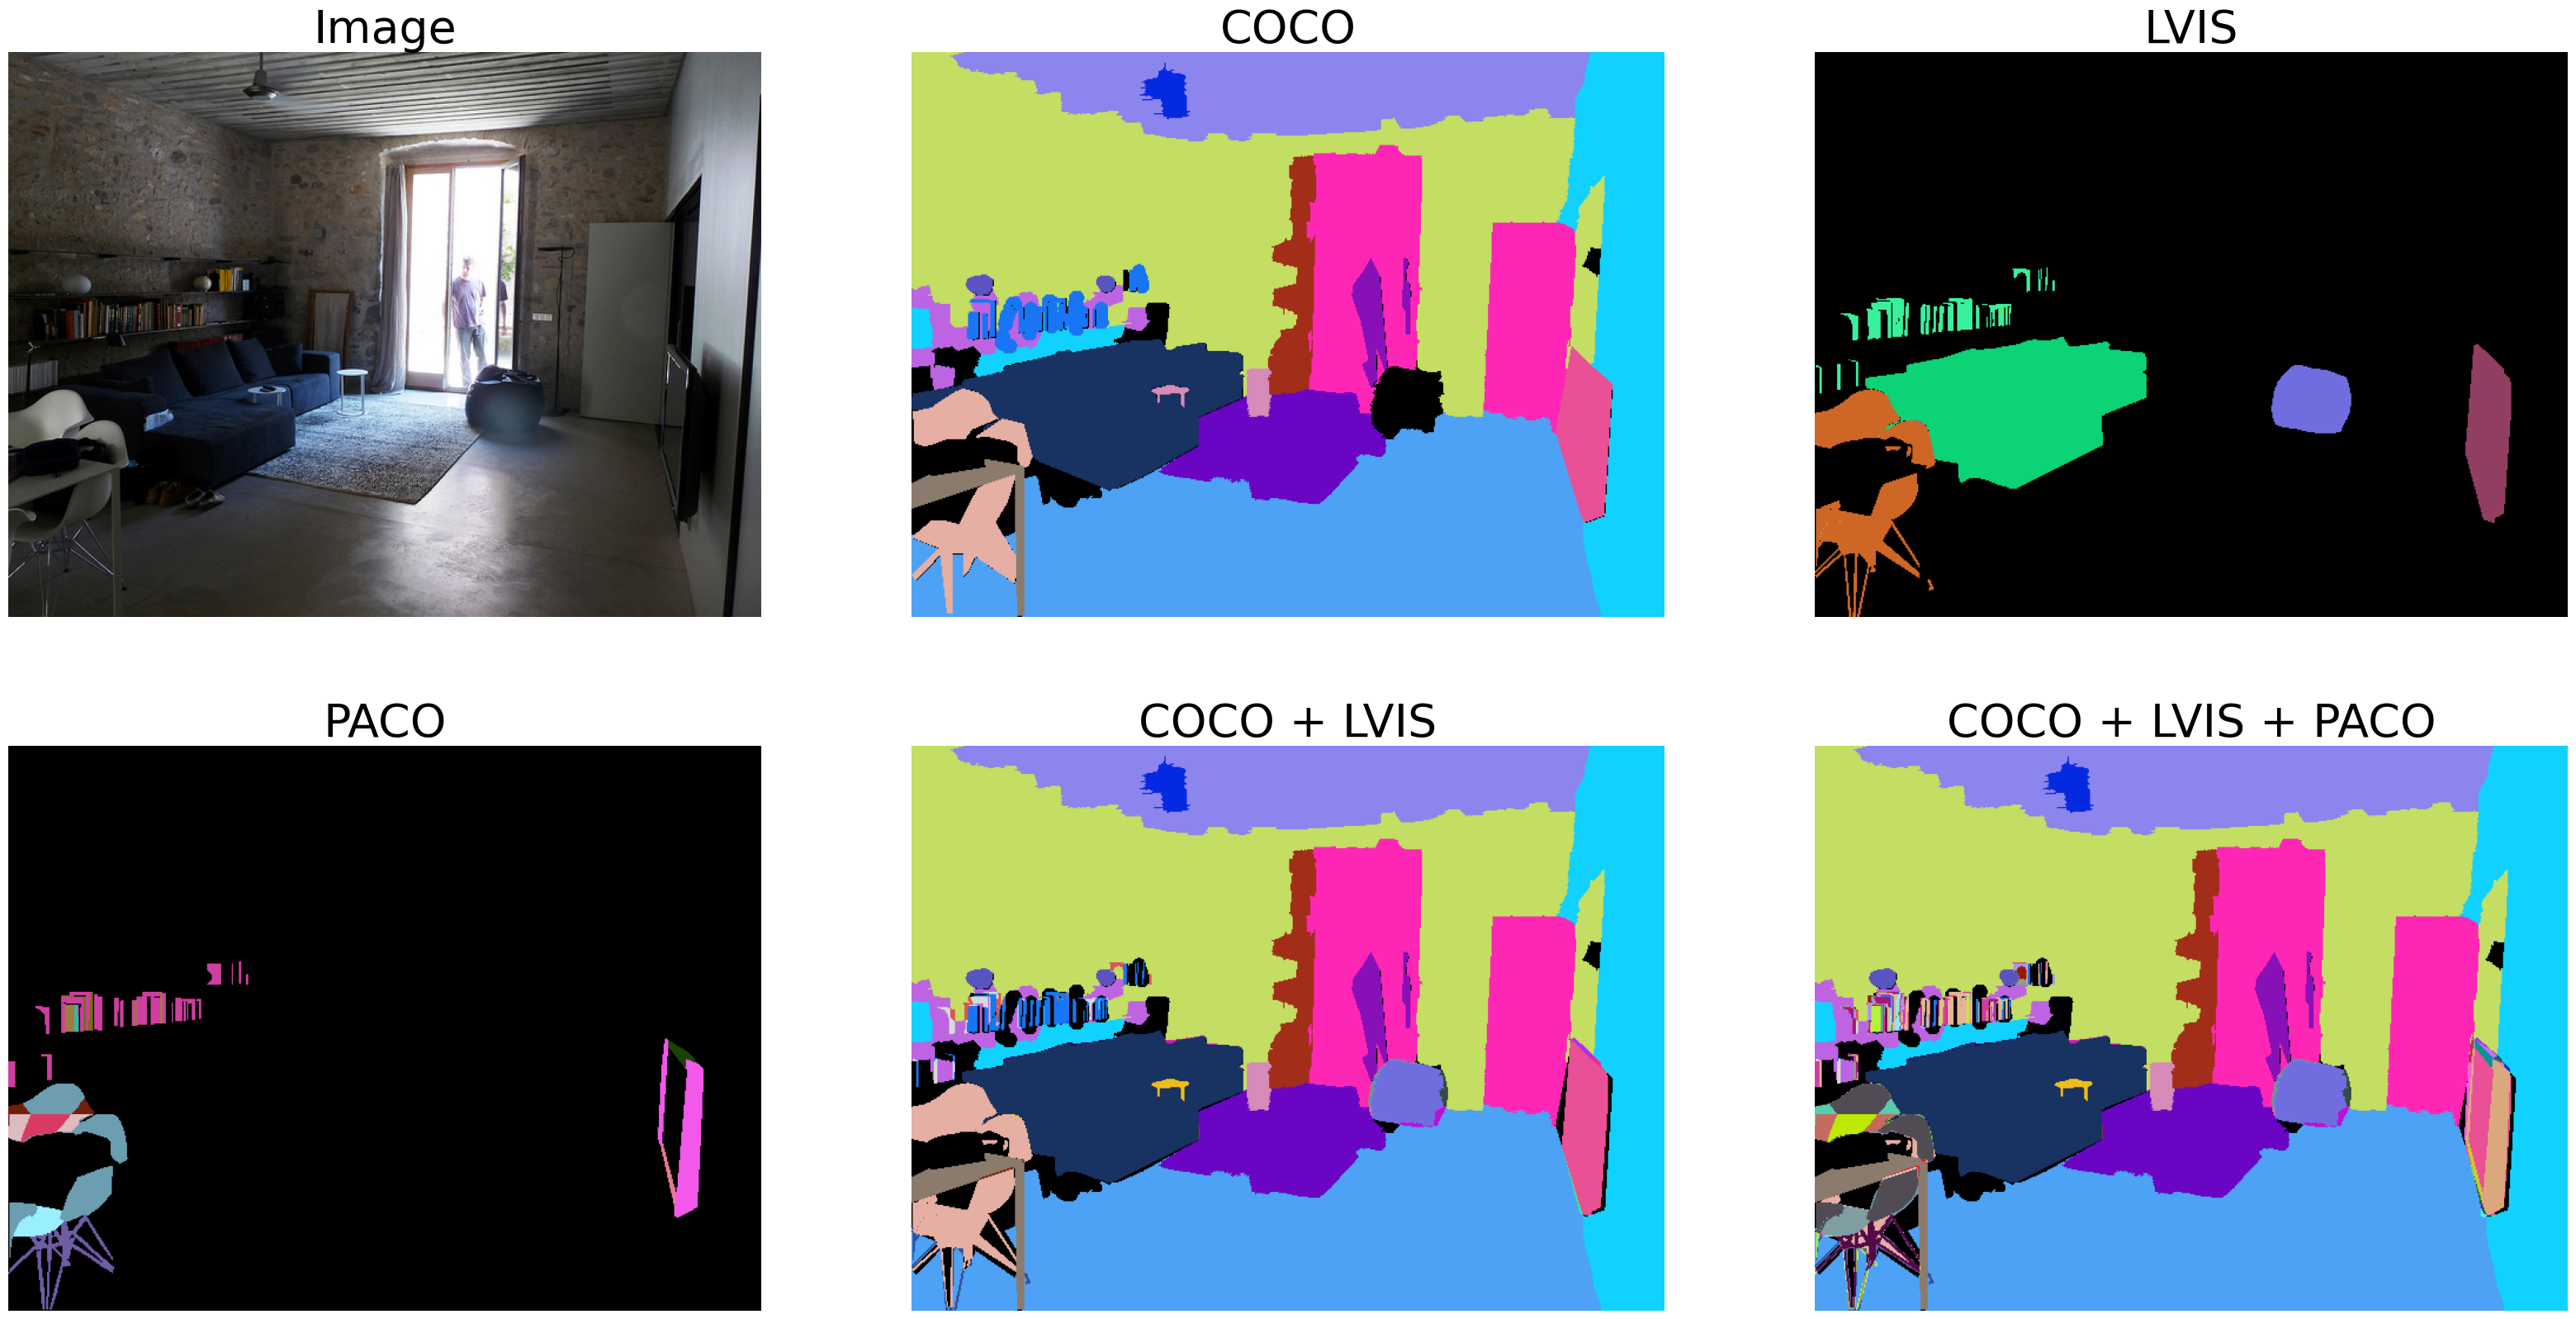

In [210]:
img_id = random.choice(all_img_ids)
img_info = merge_img_id_to_info[img_id]
img_file = os.path.join(img_dir, f"{img_info['id']:012d}.jpg")
while not os.path.exists(img_file) or img_id not in coco_img_id_to_info or img_id not in lvis_img_id_to_info or img_id not in paco_img_id_to_info or img_id not in paco_merge_img_id_to_info:
    img_id = random.choice(all_img_ids)
    img_info = merge_img_id_to_info[img_id]
    img_file = os.path.join(img_dir, f"{img_info['id']:012d}.jpg")

img = Image.open(img_file)
img_w, img_h = img.size
coco_anns = coco_img_id_to_anns[img_id]
lvis_anns = lvis_img_id_to_anns[img_id]
merg_anns = merge_img_id_to_anns[img_id]
paco_anns = paco_img_id_to_anns[img_id]
paco_obj_anns = [obj for obj, parts in paco_anns]
paco_part_anns = []
for obj, parts in paco_anns:
    paco_part_anns.extend(parts)

paco_merge_anns = paco_merge_img_id_to_anns[img_id]

print(img_id)
print("num coco anns: ", len(coco_anns))
print("num lvis anns: ", len(lvis_anns))
print("num merge anns: ", len(merg_anns))
print("num paco obj anns: ", len(paco_obj_anns))
print("num paco part anns: ", len(paco_part_anns))
print("num paco merge anns: ", len(paco_merge_anns))

coco_categories = []
mask_coco = np.zeros((img_h, img_w, 3), dtype=np.uint8)
for idx, ann in enumerate(coco_anns):
    cat_id = ann['category_id']
    cat_info = coco_category_id_to_info[cat_id]
    # print(cat_info['type'], cat_id, cat_info.get('name_text'))
    # mask = mask_utilos.decode(ann['segmentation'])
    coco_categories.append(cat_info['name_text'])
    mask = mask_utils.decode(ann['segmentation'])
    mask_coco += mask[:, :, None] * cat_info['color']

lvis_categories = []
mask_lvis = np.zeros((img_h, img_w, 3), dtype=np.uint8)
for idx, ann in enumerate(lvis_anns):
    cat_id = ann['category_id']
    cat_info = lvis_category_id_to_info[cat_id]
    lvis_categories.append(cat_info['synset'].split(".")[0])
    rles = mask_utils.frPyObjects(ann['segmentation'], img_h, img_w)
    rle = mask_utils.merge(rles)
    mask = mask_utils.decode(rle)
    mask_lvis += mask[:, :, None] * cat_info['color']

print("coco:", coco_categories)
print("lvis:", lvis_categories)


merge_categories = []
mask_merge = np.zeros((img_h, img_w, 3), dtype=np.uint8)
for idx, ann in enumerate(merg_anns):
    cat_id = ann['category_id']
    cat_info = merge_category_id_to_info[cat_id]
    # print(cat_info['type'], cat_id, cat_info.get('name_text'))
    # mask = mask_utils.decode(ann['segmentation'])
    merge_categories.append(cat_info['name_text'])
    mask = mask_utils.decode(ann['segmentation'])
    mask_merge += mask[:, :, None] * cat_info['color']
print("merge:", merge_categories)

paco_categories = []
parts_area = 0
mask_paco = np.zeros((img_h, img_w, 3), dtype=np.uint8)
for idx, (obj_ann, part_anns) in enumerate(paco_anns):
    cat_id = obj_ann['category_id']
    cat_info = paco_category_id_to_info[cat_id]
    paco_categories.append(cat_info['name'] + "(obj)")
    for ann in part_anns:
        cat_id = ann['category_id']
        cat_info = paco_category_id_to_info[cat_id]
        # print(cat_info['type'], cat_id, cat_info.get('name_text'))
        # mask = mask_utilos.decode(ann['segmentation'])
        paco_categories.append(cat_info['name'])
        mask = mask_utils.decode(ann['segmentation'])
        mask_paco += mask[:, :, None] * cat_info['color']
        parts_area += ann["area"]
print("paco_categories", paco_categories)
print(parts_area/(img_h * img_w))

paco_merge_categories = []
mask_paco_merge = np.zeros((img_h, img_w, 3), dtype=np.uint8)
for idx, ann in enumerate(paco_merge_anns):
    cat_id = ann['category_id']
    cat_info = paco_merge_category_id_to_info[cat_id]
    # print(cat_info['type'], cat_id, cat_info.get('name_text'))
    # mask = mask_utils.decode(ann['segmentation'])
    paco_merge_categories.append(cat_info['name_text'])
    mask = mask_utils.decode(ann['segmentation'])
    mask_paco_merge += mask[:, :, None] * cat_info['color']
print("paco_merge:", paco_merge_categories)

fig, axes = plt.subplots(2, 3, figsize=(30*img_w/img_h, 20))
axes = axes.flatten()

titles = ["Image", "COCO",  "LVIS", "PACO", "COCO + LVIS", "COCO + LVIS + PACO"]
all_masks = [img, mask_coco, mask_lvis, mask_paco, mask_merge, mask_paco_merge]

for ax, title, m in zip(axes, titles, all_masks):
    ax.imshow(m)
    ax.set_title(title, fontsize=40)
    ax.axis('off') 
plt.show()

In [179]:
def lvis_mask_to_rle(segm, height, width):
    rles = mask_utils.frPyObjects(segm, height, width)
    rle = mask_utils.merge(rles)
    rle["counts"] = rle["counts"].decode("utf-8")
    return rle

In [180]:
coco_masks = [c['segmentation'] for c in coco_anns]
lvis_masks = [lvis_mask_to_rle(c['segmentation'], img_info['height'], img_info['width']) for c in lvis_anns]
iou = mask_utils.iou(coco_masks, lvis_masks, [0] * len(lvis_masks))
iou.shape
does_overlap = iou.max(axis=1) > 0.5
print("      ", lvis_categories)
for idx, (c, o) in enumerate(zip(coco_categories, does_overlap)):
    print(f"{c:8}", f"{o:8}", iou[idx])

print("\n", merge_categories)

       ['drawer', 'drawer', 'drawer', 'drawer', 'drawer', 'electric_refrigerator', 'cabinet', 'cabinet', 'cabinet', 'cabinet', 'dog', 'knob', 'knob', 'knob', 'knob', 'knob', 'knob', 'handle', 'handle', 'handle', 'handle', 'handle', 'handle', 'handle', 'handle']
person          0 [0.         0.         0.         0.         0.         0.
 0.         0.0030917  0.         0.         0.00018063 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
dog             1 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.86062092 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
bottle          0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
spoon           0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
bowl        

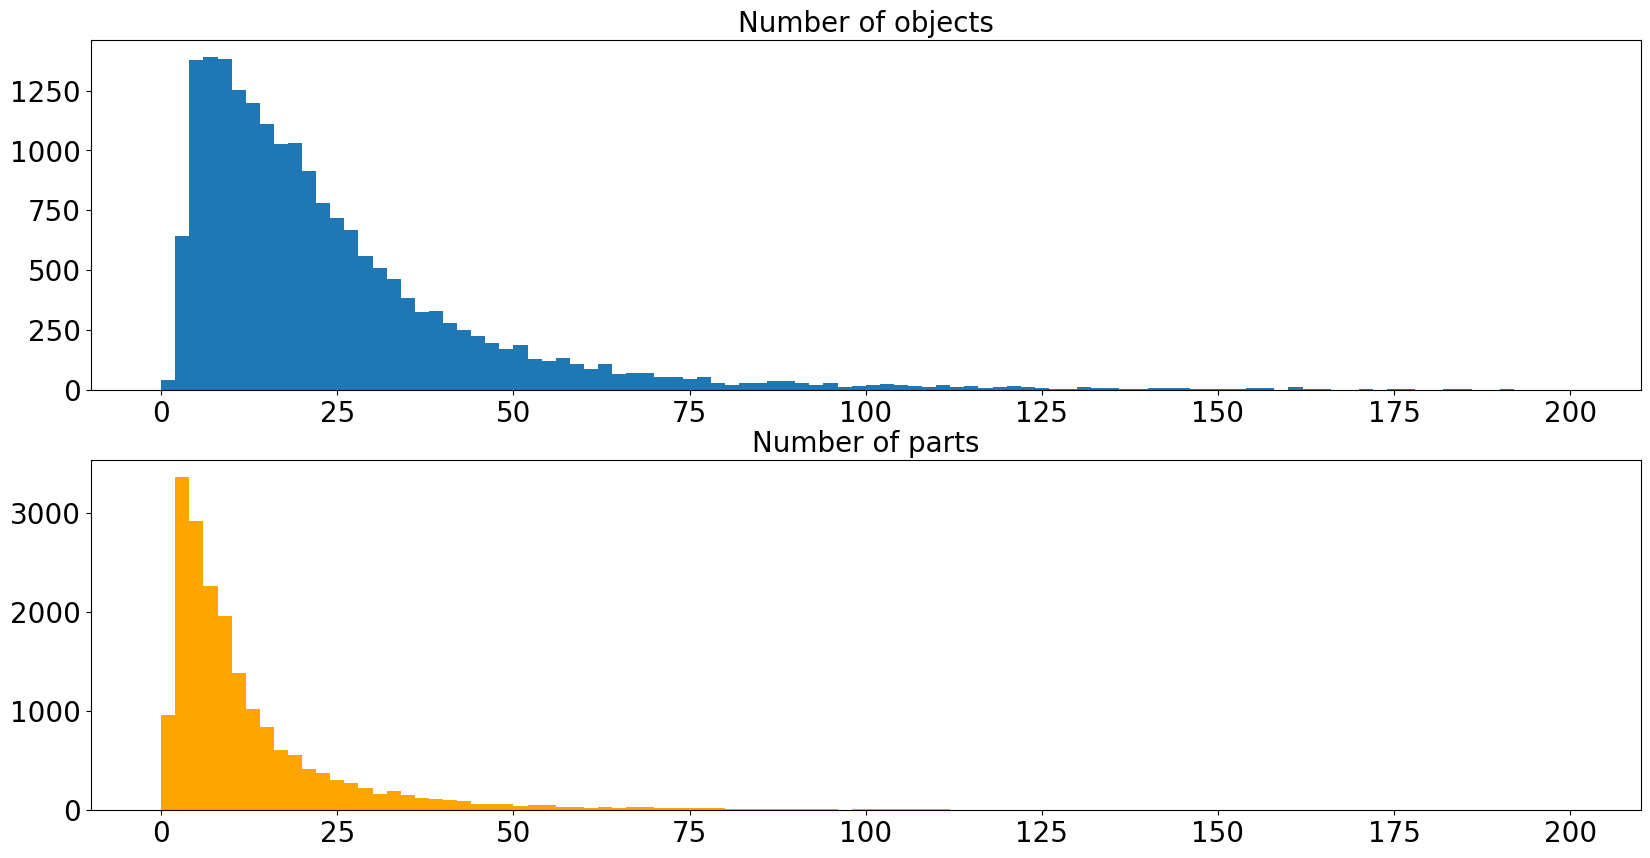

In [207]:
img_num_objs = []
img_num_parts = []
for img_id, anns in paco_merge_img_id_to_anns.items():
    num_obj = len([1 for ann in anns if paco_merge_category_id_to_info[ann["category_id"]]["type"] != "part"])
    num_part = len([1 for ann in anns if paco_merge_category_id_to_info[ann["category_id"]]["type"] == "part"])
    img_num_objs.append(num_obj)
    img_num_parts.append(num_part)

# draw hist
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
ax, ax2 = axes.flatten()
ax.hist(img_num_objs, bins=100, range=(0, 200))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("Number of objects", fontsize=20)
 
ax2.hist(img_num_parts, bins=100, range=(0, 200), color="orange")
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_title("Number of parts", fontsize=20)


# ax.legend(fontsize=20)
# ax.set_xlabel("Number of objects/parts", fontsize=20)
# ax.set_ylabel("Number of images", fontsize=20)
plt.show()
